<a href="https://colab.research.google.com/github/namozhdehi/KSR/blob/main/NYC_Taxi_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

## Imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load The Data

In [25]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

## Explore The Data

In [26]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [27]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [28]:
df.shape

(729322, 11)

In [29]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

# **Variable Identification and Typecasting**

In [30]:
df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


There are a lot of variables visible at each types, so let's narrow this down by looking **at one datatype at once**. We will start with int

# **Integer Data Type**

In [31]:
df.dtypes[df.dtypes == 'int64']

,0
vendor_id,int64
passenger_count,int64
trip_duration,int64


**Summary:**
- **vendor_id** are a unique number assigned to customers therefore it is **Ok to be integer**.
- **passenger_count** shows the number of passanger in each trips and it's **OK to be integer.**
- **trip_duration** indicates length of each trip so it's **OK to be integer.**

# **Float Data Type**

In [32]:
df.dtypes[df.dtypes == 'float64']

,0
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64


**Summary:**
- **pickup_longitude** is expected to be a float number so it **should not be changed.**
- **pickup_latitude** is expected to be a float number therefore **we do not need to change it.**
- **dropoff_longitude** is expected to be a float number so it **should not be changed.**
- **dropoff_latitude** is expected to be a float number therefore **we do not need to change it.**

In [33]:
df.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


*    **variables like 'pickup_datetime'** and **'dropoff_datetime' has  object type**. This means that **Pandas was not able to recognize the datatype** of these variables.

In [34]:
df[['pickup_datetime',  'dropoff_datetime' , 'store_and_fwd_flag' ]].head()

,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,2016-02-29 16:40:21,2016-02-29 16:47:01,N
1,2016-03-11 23:35:37,2016-03-11 23:53:57,N
2,2016-02-21 17:59:33,2016-02-21 18:26:48,N
3,2016-01-05 09:44:31,2016-01-05 10:03:32,N
4,2016-02-17 06:42:23,2016-02-17 06:56:31,N


- **'pickup_datetime'** and **'dropoff_datetime'** should be a datetime variable.


In [35]:
df['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,725282
Y,4040


- **store_and_fwd_flag** is a **cartegorical** variable.

## **Date related variables**

In [36]:
# Convert date field to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Convert datetime field to date
df['pickup_date'] = df['pickup_datetime'].dt.date
df['dropoff_date'] = df['dropoff_datetime'].dt.date

# Convert datetime field to time
df['pickup_time'] = df['pickup_datetime'].dt.time
df['dropoff_time'] = df['dropoff_datetime'].dt.time

# last day of year
df['doy_pickup_datetime'] = df['pickup_datetime'].dt.dayofyear
df['doy_dropoff_datetime'] = df['dropoff_datetime'].dt.dayofyear

# week of year
#df['woy_pickup_datetime'] = df['pickup_datetime'].dt.isocalendar
#df['woy_dropoff_datetime'] = df['dropoff_datetime'].dt.isocalendar

# month of year
df['moy_pickup_datetime'] = df['pickup_datetime'].dt.month
df['moy_dropoff_datetime'] = df['dropoff_datetime'].dt.month

# day of week
df['dow_pickup_datetime'] = df['pickup_datetime'].dt.dayofweek
df['dow_dropoff_datetime'] = df['dropoff_datetime'].dt.dayofweek

# hour of day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['hour_dropoff_datetime'] = df['dropoff_datetime'].dt.hour

In [37]:
# checking new extracted columns using datetime
df[['pickup_datetime','doy_pickup_datetime','moy_pickup_datetime','dow_pickup_datetime', 'pickup_hour']].head()

,pickup_datetime,doy_pickup_datetime,moy_pickup_datetime,dow_pickup_datetime,pickup_hour
0,2016-02-29 16:40:21,60,2,0,16
1,2016-03-11 23:35:37,71,3,4,23
2,2016-02-21 17:59:33,52,2,6,17
3,2016-01-05 09:44:31,5,1,1,9
4,2016-02-17 06:42:23,48,2,2,6


In [38]:
df[['dropoff_datetime', 'doy_dropoff_datetime','moy_dropoff_datetime','dow_dropoff_datetime', 'pickup_hour']].head()

,dropoff_datetime,doy_dropoff_datetime,moy_dropoff_datetime,dow_dropoff_datetime,pickup_hour
0,2016-02-29 16:47:01,60,2,0,16
1,2016-03-11 23:53:57,71,3,4,23
2,2016-02-21 18:26:48,52,2,6,17
3,2016-01-05 10:03:32,5,1,1,9
4,2016-02-17 06:56:31,48,2,2,6


**Convert hour to time of day**

In [39]:
import pandas as pd

# Define bins and corresponding labels (duplicate labels allowed)
bins = [0, 5, 12, 17, 21, 24]
labels = ['Night', 'Morning', 'Noon', 'Evening', 'Night']

# Categorize hours using pd.cut with custom bins and duplicate labels
df['pickup_time_of_day'] = pd.cut(df['pickup_hour'],
                                  bins=bins,
                                  labels=labels,
                                  right=False,
                                  include_lowest=True,
                                  ordered=False)  # Allows duplicate labels

df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_time,doy_pickup_datetime,doy_dropoff_datetime,moy_pickup_datetime,moy_dropoff_datetime,dow_pickup_datetime,dow_dropoff_datetime,pickup_hour,hour_dropoff_datetime,pickup_time_of_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,16:47:01,60,60,2,2,0,0,16,16,Noon
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,23:53:57,71,71,3,3,4,4,23,23,Night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,18:26:48,52,52,2,2,6,6,17,18,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,10:03:32,5,5,1,1,1,1,9,10,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,06:56:31,48,48,2,2,2,2,6,6,Morning


**Convert date to day of the week**

In [41]:
import pandas as pd

def convert_to_day_of_week(df, column_name):
    """
    Converts a datetime column to the day of the week in string format.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the datetime column.
    column_name (str): The name of the datetime column to convert.

    Returns:
    pd.Series: A Series containing the day of the week for each datetime.
    """
    # Convert the column to datetime
    df[column_name] = pd.to_datetime(df[column_name])

    # Create a new column with the day of the week
    df['day_of_week'] = df[column_name].dt.day_name()

    return df['day_of_week']

# Assuming df is your DataFrame
df['pickup_day_of_week'] = convert_to_day_of_week(df, 'pickup_datetime')

**Convert date to month name**

In [42]:
import pandas as pd

def convert_to_month_name(df, column_name):
    """
    Converts a datetime column to the month name in string format.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the datetime column.
    column_name (str): The name of the datetime column to convert.

    Returns:
    pd.Series: A Series containing the month name to each datetime.
    """
    # Convert the column to datetime if it's not already
    df[column_name] = pd.to_datetime(df[column_name])

    # Create a new column with the month name
    df['month_name'] = df[column_name].dt.month_name()

    return df['month_name']

# Assuming df is your DataFrame
df['pickup_month_name'] = convert_to_month_name(df, 'pickup_datetime')

In [43]:
df[['pickup_hour', 'trip_duration']].head()

,pickup_hour,trip_duration
0,16,400
1,23,1100
2,17,1635
3,9,1141
4,6,848


## Univariate Analysis: Numerical Variables

In [44]:
# Numerical datatypes
df.select_dtypes(include=['int32', 'int64', 'float64','Int64']).dtypes

,0
vendor_id,int64
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
trip_duration,int64
doy_pickup_datetime,int32
doy_dropoff_datetime,int32
moy_pickup_datetime,int32


In [45]:
# seggregating variables into groups
ride_details = ['vendor_id', 'passenger_count', 'trip_duration']
pickuptime = ['doy_pickup_datetime',  'moy_pickup_datetime', 'dow_pickup_datetime', 'pickup_hour']
dropofftime = ['dropoff_datetime', 'doy_dropoff_datetime','moy_dropoff_datetime','dow_dropoff_datetime', 'pickup_hour']
coordinates = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def UVA_numeric(data, var_group):
    """
    This function takes a dataframe and a variable group as arguments
    and converts the variable group to numeric.
    It then calculates the descriptives of the variable.
    """
    size = len(var_group)
    cols = 3  # Number of columns per row
    rows = (size // cols) + (size % cols > 0)  # Calculate number of rows needed

    plt.figure(figsize=(7*cols, 5*rows), dpi=100)

    for j, i in enumerate(var_group):
        # Check if the column exists in the DataFrame
        if i not in data.columns:
            print(f"Column '{i}' not found in the DataFrame.")
            continue

        try:
            # Attempt to convert the column to numeric
            data[i] = pd.to_numeric(data[i], errors='coerce')
        except TypeError as e:
            # Handle TypeError, print the original exception and problematic value
            print(f"Error converting column '{i}': {e}")
            problematic_value = data[i].iloc[0]  # Get the first problematic value
            print(f"Problematic value: {problematic_value}, Type: {type(problematic_value)}")
            continue

        # Calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # Calculating points of standard deviation
        points = mean - st_dev, mean + st_dev

        # Plotting the variable with every information
        plt.subplot(rows, cols, j + 1)
        sns.kdeplot(data[i], shade=True)

        # Plotting standard deviation, min/max, mean, and median using lines
        plt.axvline(x=points[0], color='black', linestyle='--', label="std_dev")
        plt.axvline(x=points[1], color='black', linestyle='--')
        plt.axvline(x=mini, color='orange', linestyle='-', label="min/max")
        plt.axvline(x=maxi, color='orange', linestyle='-')
        plt.axvline(x=mean, color='red', linestyle='-', label="mean")
        plt.axvline(x=median, color='blue', linestyle='-', label="median")

        plt.xlabel('{}'.format(i), fontsize=20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(
            (round(points[0], 2), round(points[1], 2)),
            round(kurt, 2),
            round(skew, 2),
            (round(mini, 2), round(maxi, 2), round(ran, 2)),
            round(mean, 2),
            round(median, 2)))

        plt.legend(loc='upper right')  # Place the legend in the upper right corner

    plt.tight_layout()
    plt.show()

**Rides Details**

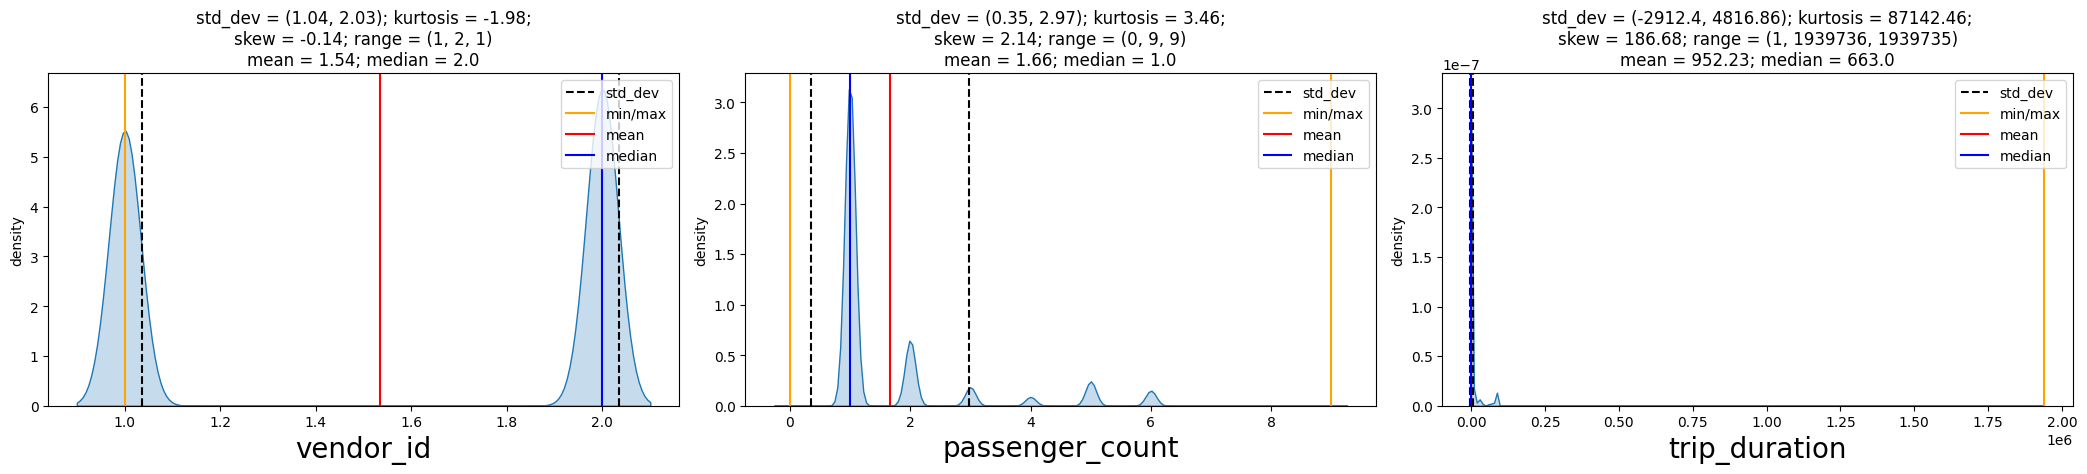

In [47]:
UVA_numeric(df,ride_details)

**Summary of Rides:**

- **vendor_id:**

    *    The vendor ID Can be eliminated from data.
- **passenger_count:**

    *    **Distribution:** The majority of rides have either 1 or 2 passengers.
    *    **Mean & Median:** The mean is 1.67, and the median is 1.0, showing that most rides have a single passenger.
    *    **Skewness:** The skewness is 2.12, indicating a significant right skew due to a small number of rides with more passengers.
    *    **Kurtosis:** Kurtosis is 3.42, suggesting a peaked distribution with a higher likelihood of extreme values.

- **trip_duration:**

    *    **Distribution:** The distribution of trip duration is extremely skewed, with the vast majority of trips being short, and a few trips being exceptionally long.
    *    **Mean & Median:** The mean is 947.79 seconds, and the median is 663.0 seconds, indicating that the average trip is longer than the typical (median) trip.
    *    **Skewness:** Skewness is extremely high at 25.86, indicating a strong right skew with a long tail of longer trips.
    *    **Kurtosis:** Kurtosis is 700.7, showing a very sharp peak with extreme outliers.


**Things to Investigate Further down the road:**
- Trip duration: Most trips are short but a few are very long trips. These extreme values need special attention.







**Pickup Time**

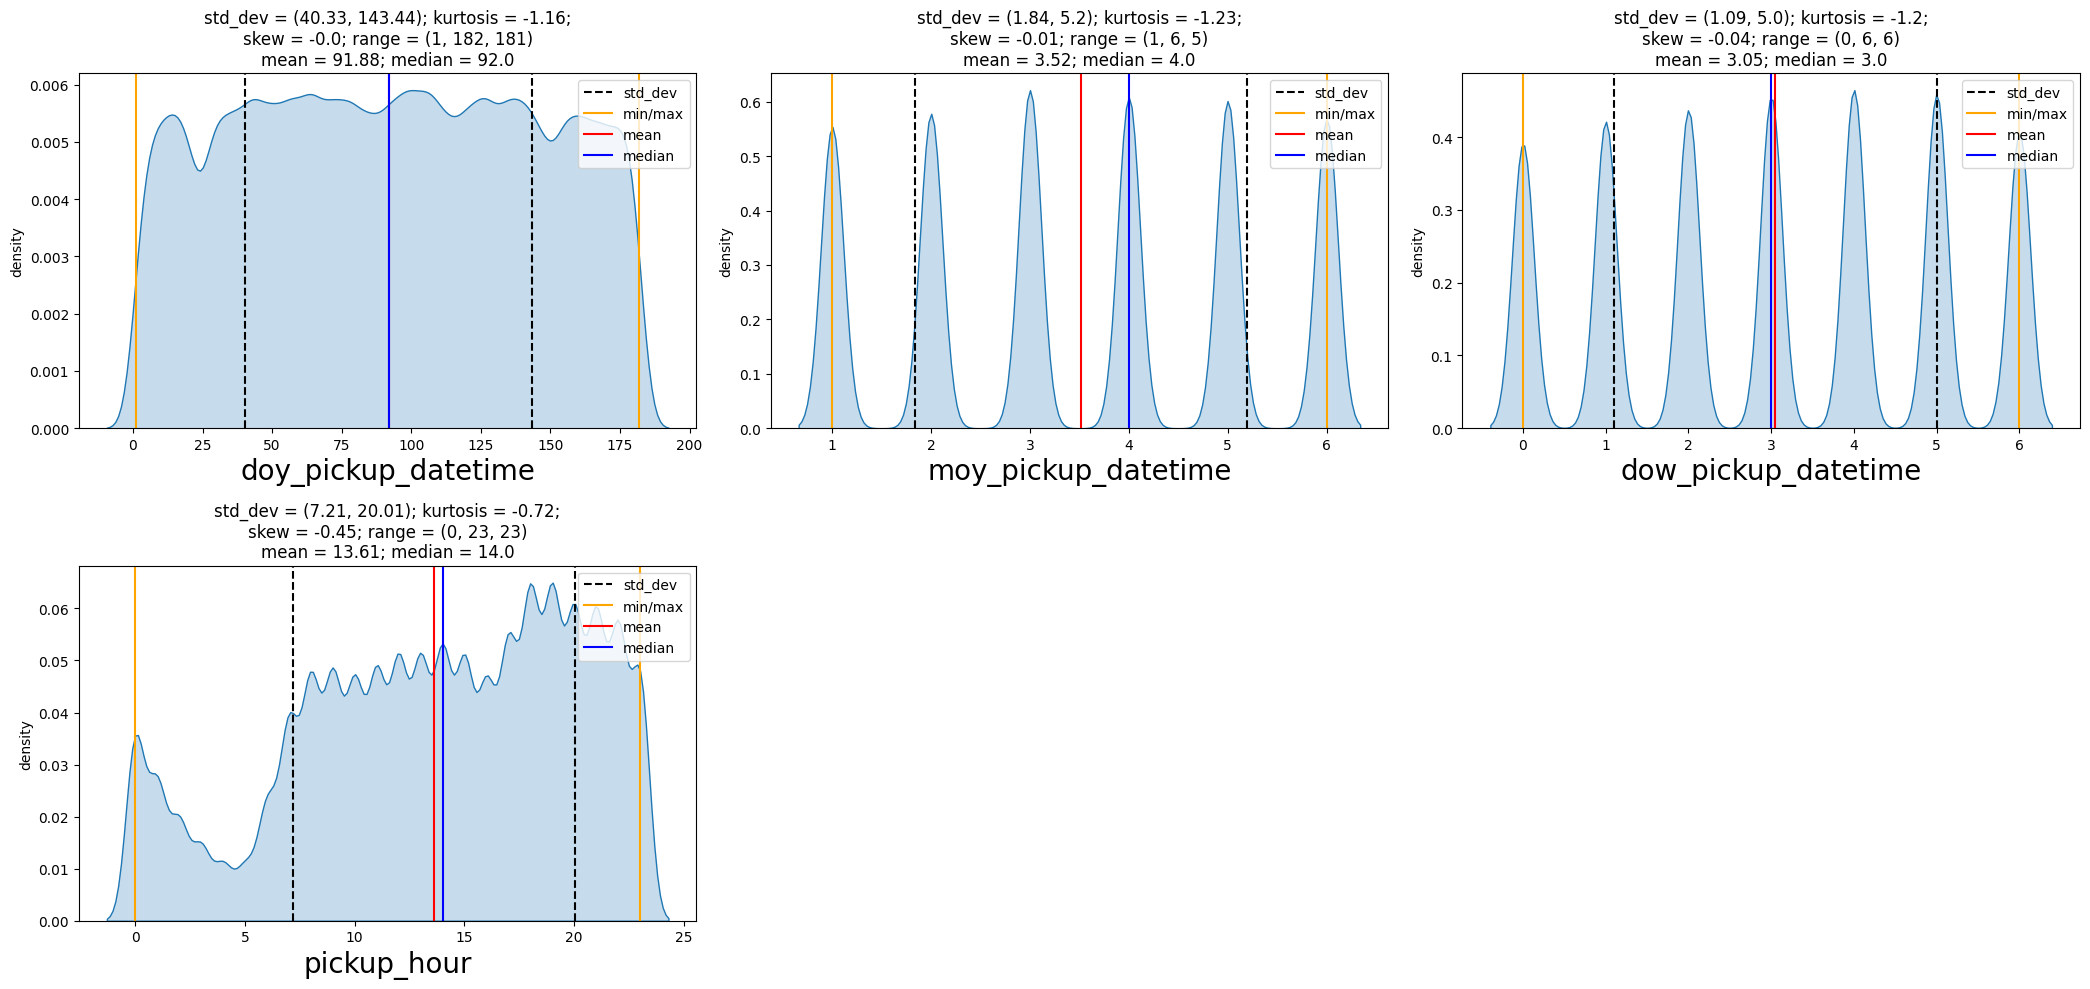

In [48]:
UVA_numeric(df,pickuptime)

**Summary of pickup time**
- **doy_pickup_datetime:**

    *    **Distribution:** The distribution of day-of-year pickups is relatively uniform..
    *    **Mean & Median:** The mean is 91.88, and the median is 92.0, which aligns closely with the distribution being centered around the first quarter of the year.
    *    **Skewness:** Skewness is very close to zero (-0.01), indicating a nearly symmetrical distribution.
    *    **Kurtosis:** Kurtosis is -1.16 which shows a slightly flatter distribution compared to a normal distribution.
    *    **Conclusion:** The day-of-year pickup times are well-distributed with minimal skew, indicating steady ride activity over time.

- **moy_pickup_datetime:**

    *    **Distribution:** The distribution shows clear peaks for specific months, likely corresponding to seasonal patterns in ride activity.
    *    **Mean & Median:** The mean is 3.52, and the median is 4.0, suggesting that rides are slightly more frequent in the spring months.
    *    **Skewness:** Skewness is -0.02 which indicats a near-symmetric distribution across months.
    *    **Kurtosis:** Kurtosis is -1.23.
    *    **Conclusion:** Ride activity seems to be seasonal, with higher frequencies in certain months.
- **dow_pickup_datetime:**

    *    **Distribution:** The distribution shows a uniform pattern across the days of the week.
    *    **Mean & Median:** The mean is 3.05, and the median is 3.0, indicating that mid-week rides are slightly more common.
    *    **Skewness:** Skewness is nearly zero (-0.05) which shows a balanced distribution across the days.
    *    **Kurtosis:** Kurtosis is -1.21, indicating a flat distribution with fewer outliers.
    *    **Conclusion:** Ride activity is spread across the days of the week.
- **pickup_hour:**

    *    **Distribution:** The distribution shows clear peaks during morning and evening hours, corresponding to typical commuting times.
    *    **Mean & Median:** The mean is 13.62, and the median is 14.0, suggesting that afternoon rides are more common.
    *    **Skewness:** Skewness is negative (-0.45) which indicates a small bias towards the early hours of the day.
    *    **Kurtosis:** Kurtosis is -0.73 which shows a moderately flat distribution.
    *    **Conclusion:** Ride activity peaks during typical rush hours, with a slight preference for afternoon rides.
- **Things to Investigate Further:**

The relatively uniform distribution of ride activity across the year and week suggests steady demand, but seasonal and weekly variations might still require targeted analysis.

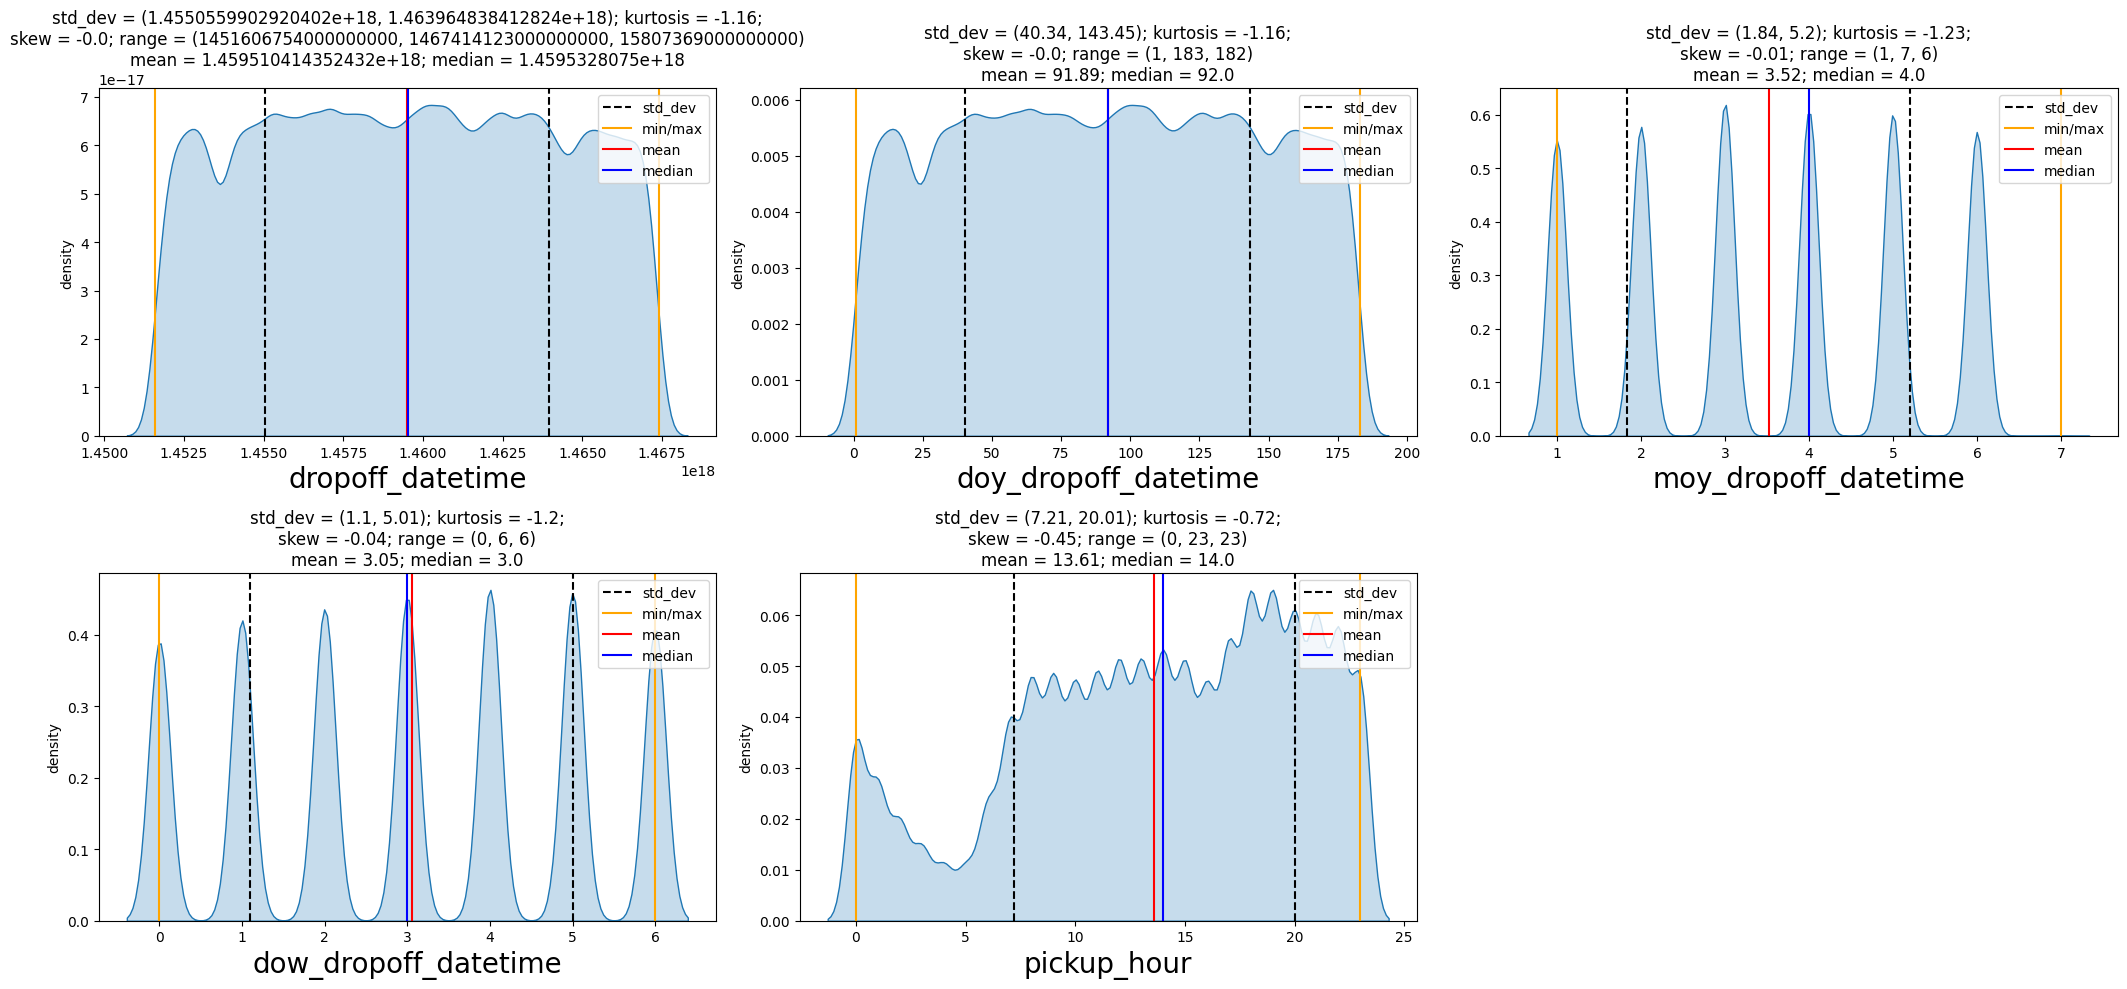

In [49]:
UVA_numeric(df,dropofftime)

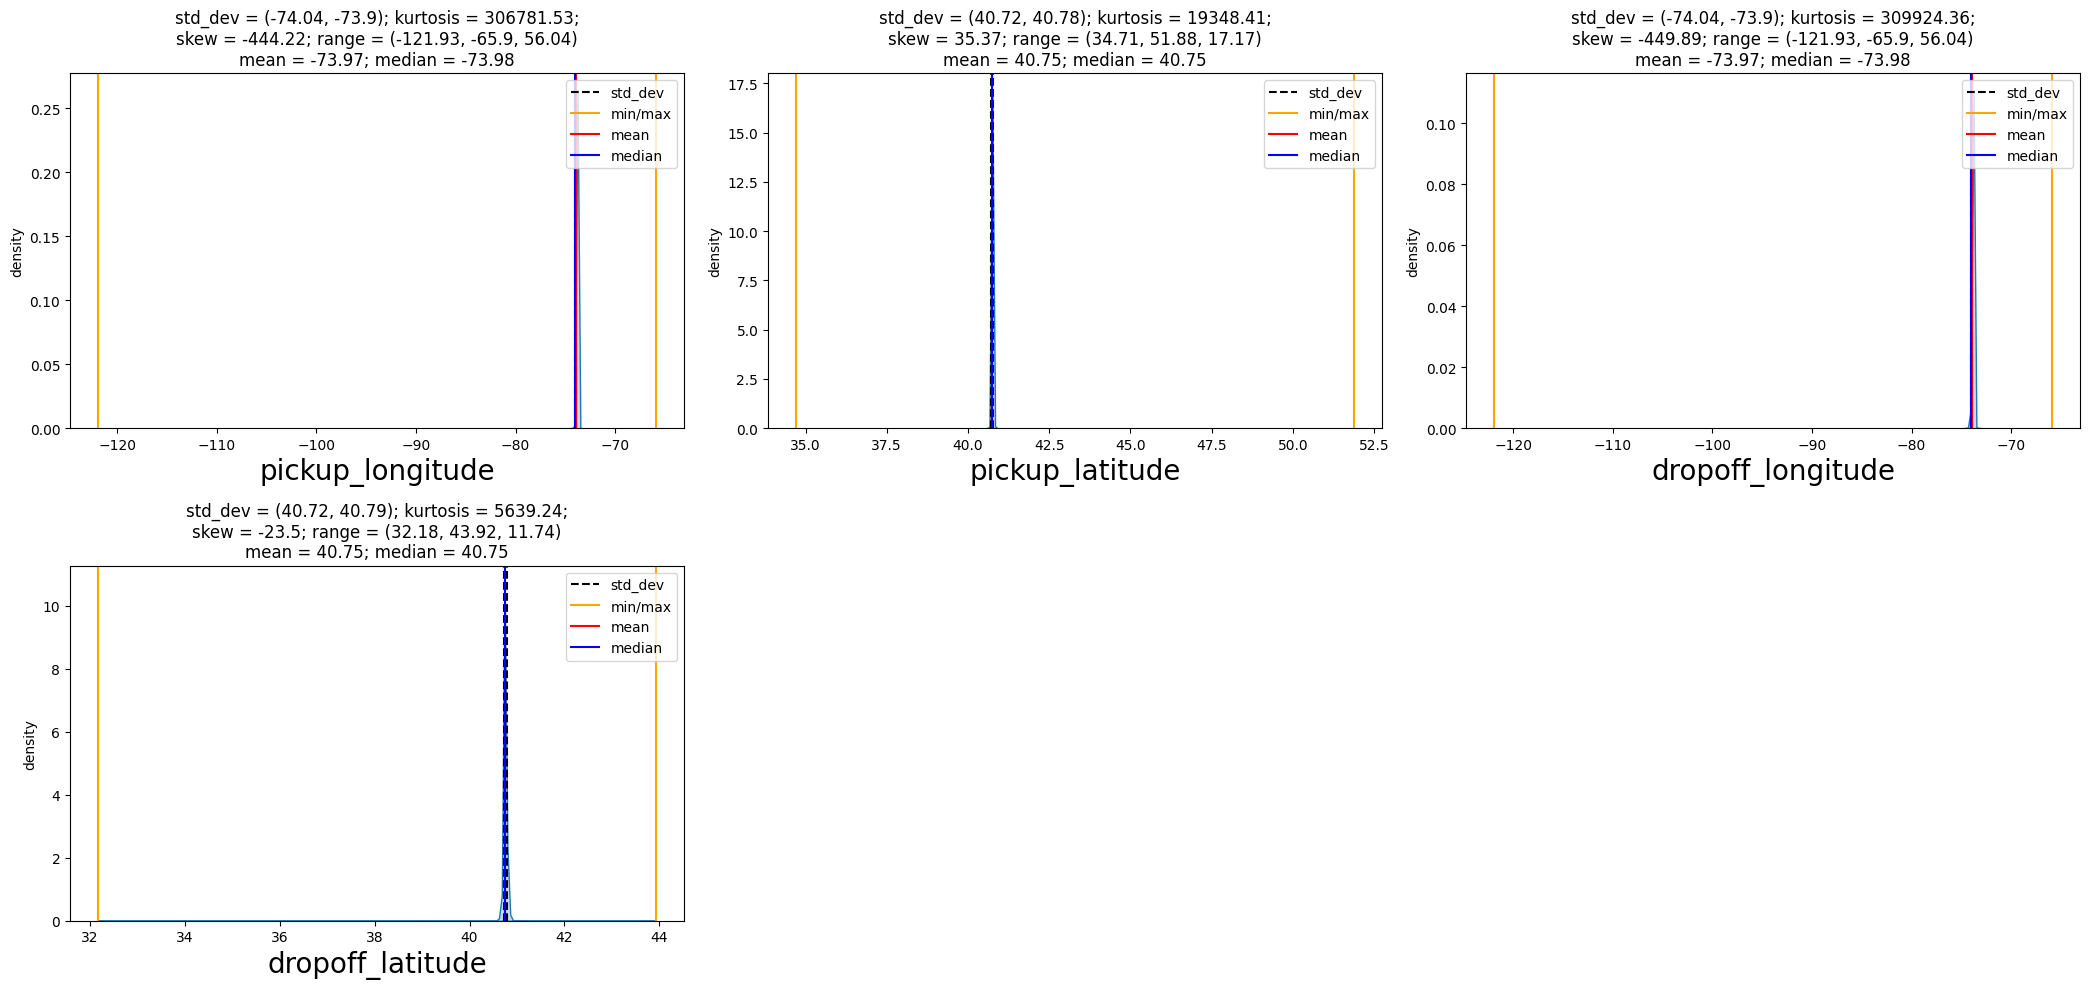

In [50]:
UVA_numeric(df,coordinates)

# **Summary**
*    **pickup_longitude:**

    *    Mean & Median: Both the mean and median are approximately -73.97, showing very little deviation in the main cluster of data.
    *    Skewness: The skewness is highly negative (-25.98), indicating a strong left skew with some extreme outliers pulling the tail.
    *    Kurtosis: The kurtosis is extremely high (3597.29), showing a very sharp peak and heavy tails due to outliers.


*    **pickup_latitude:**
    *    Mean & Median: Both mean and median are 40.75, indicating a very symmetric distribution around this central value.
    *    Skewness: The skewness is slightly negative (-0.72), showing a very minor left skew.
    *    Kurtosis: The kurtosis is moderately high (15.9), indicating a peaked distribution with some outliers.


*    **dropoff_longitude:**

    *    Distribution: Similar to pickup_longitude, the dropoff longitude is concentrated around -74 with a few extreme outliers.
    *    Mean & Median: The mean and median are both -73.97, closely aligned with the pickup_longitude.
    *    Skewness: Skewness is highly negative (-40.97), indicating a significant left skew due to outliers.
    *    Kurtosis: Kurtosis is extremely high (6209.99), indicating a very sharp peak with heavy tails.

*    **dropoff_latitude:**

    *    Distribution: The data is concentrated around 40.75 degrees latitude, with very little variation.
    *    Mean & Median: Both mean and median are 40.75, suggesting a very symmetric distribution.
    *    Skewness: The skewness is slightly positive (0.64), showing a minor right skew.
    *    Kurtosis: The kurtosis is moderately high (43.67), indicating a peaked distribution with some outliers.

*    **Things to Investigate Further:**
The significant outliers in both longitude and latitude, as they could represent data entry errors or unusual ride patterns.
The extreme kurtosis values suggest that the data may have some very extreme values that could impact modeling efforts. These should be carefully reviewed and possibly cleaned.

## Univariate Analysis : Categorical Varibales

In [51]:
df.select_dtypes(exclude=['int64','float64','Int64']).dtypes

,0
id,object
pickup_datetime,datetime64[ns]
store_and_fwd_flag,object
pickup_date,object
dropoff_date,object
pickup_time,object
dropoff_time,object
doy_pickup_datetime,int32
doy_dropoff_datetime,int32
moy_pickup_datetime,int32


**Grouping Variables**

**- Rides_info:** passenger_count

**- pick_up:** moy_pickup_datetime, dow_pickup_datetime, pickup_time_of_day

**- drop_off:** moy_dropoff_datetime, dow_dropoff_datetime

**Rides_info**

In [52]:
def UVA_category(data, var_group):
    '''
    countplot_category
    takes a group of variables (category) and plots count plots for each variable.
    '''

    size = len(var_group)
    plt.figure(figsize=(7 * size, 5), dpi=100)

    # For every variable
    for j, i in enumerate(var_group):
        plt.subplot(1, size, j + 1)
        # Use the 'viridis' palette for vibrant colors
        line = sns.countplot(x=data[i], palette='viridis')
        line.set_ylabel("Count", fontsize=15)
        line.set_xlabel(f"{i}", fontsize=15)
        line.set_title(f'{i} Count', fontsize=20)

    plt.tight_layout()
    plt.show()

In [53]:
Rides = ['vendor_id','passenger_count', 'store_and_fwd_flag']
pickup = [ 'pickup_month_name', 'pickup_day_of_week', 'pickup_time_of_day']
dropoff = ['moy_dropoff_datetime', 'dow_dropoff_datetime']

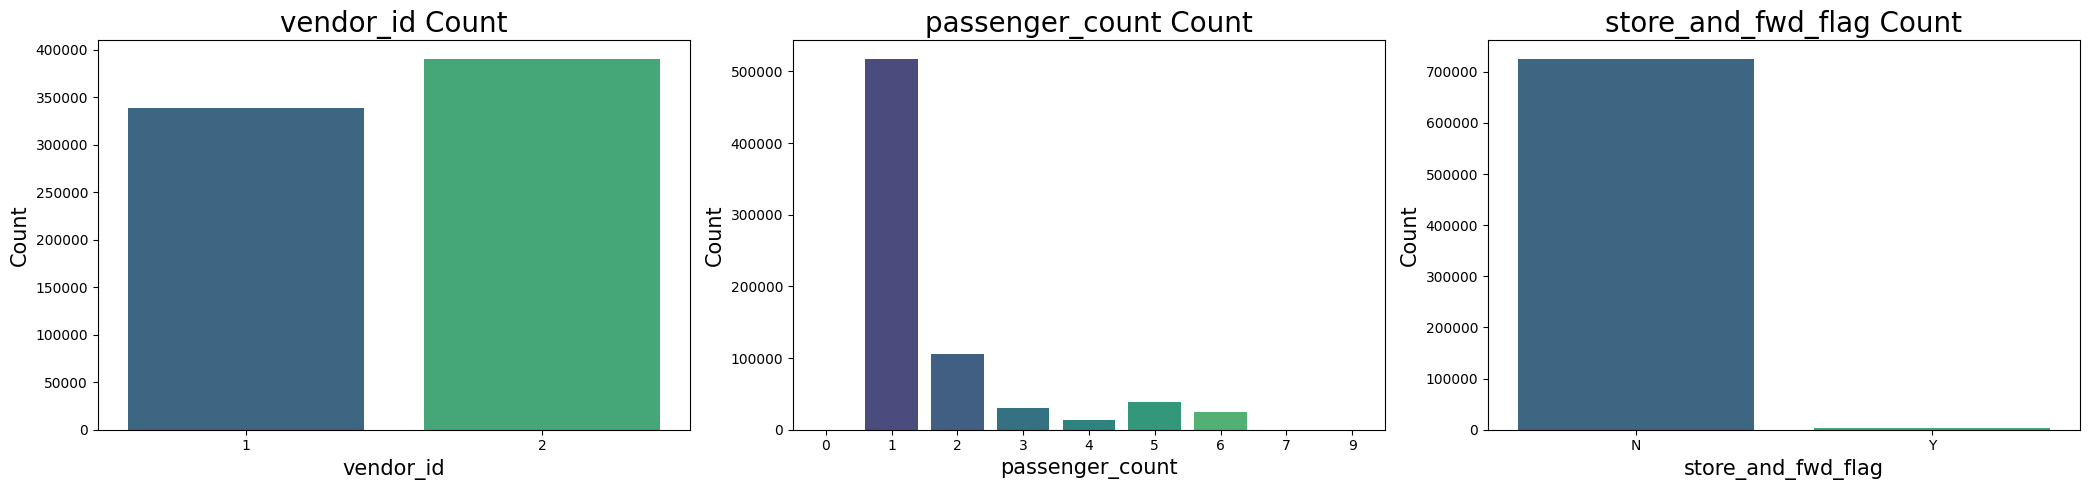

In [54]:
UVA_category(df, Rides)

# **Summary**
*    **vendor_id:**

    *    Distribution: The data is tightly clustered around two distinct vendor IDs (1 and 2), with a nearly uniform distribution between them.
    *    Mean & Median: The mean is 1.53, and the median is 2.0, indicating a slight skew towards vendor ID 1.
    *    Skewness: Skewness is -0.14, suggesting a slight left skew, but it's very close to symmetric.
    *    Kurtosis: Kurtosis is -1.98, indicating a flatter distribution with fewer extreme values than a normal distribution.

*    **passenger_count:**

    *    Distribution: The majority of trips have 1 passenger, followed by trips with 2 passengers. Few trips have more than 3 passengers, and almost no trips have 7 or 9 passengers.
    *    Mean & Median: The mean is 1.67, and the median is 1.0, showing that most trips involve a single passenger.
    *    Skewness: The skewness is positive (2.12), indicating a right skew due to a small number of trips with more passengers.
    *    Kurtosis: The kurtosis is high (3.42), suggesting a peaked distribution with potential outliers.
    
*    **store_and_fwd_flag:**

    *    Distribution: The majority of trips have a "N" (No) value, indicating that the trip data was not stored and forwarded. Only a very small fraction of trips have a "Y" (Yes) value.
    *    Mean & Median: The mean is close to 0.05, and the median is 0.0, reflecting the dominance of the "N" category.
    *    Skewness: The skewness is highly negative (-14.62), showing a strong left skew due to the imbalance.
    *    Kurtosis: The kurtosis is extremely high (215.49), indicating a sharp peak and heavy tail due to the rarity of the "Y" category.


*    **Things to Investigate Further:**
The significant skewness and kurtosis in the passenger count distribution suggest that outliers or unusual cases (such as trips with 7 or 9 passengers) should be further investigated. These could indicate data entry errors or special trip categories.
The extreme imbalance in the "store_and_fwd_flag" variable, particularly the rarity of "Y" values, may require additional attention. Understanding the circumstances under which trips are stored and forwarded could provide valuable insights into the data collection process and its reliability.

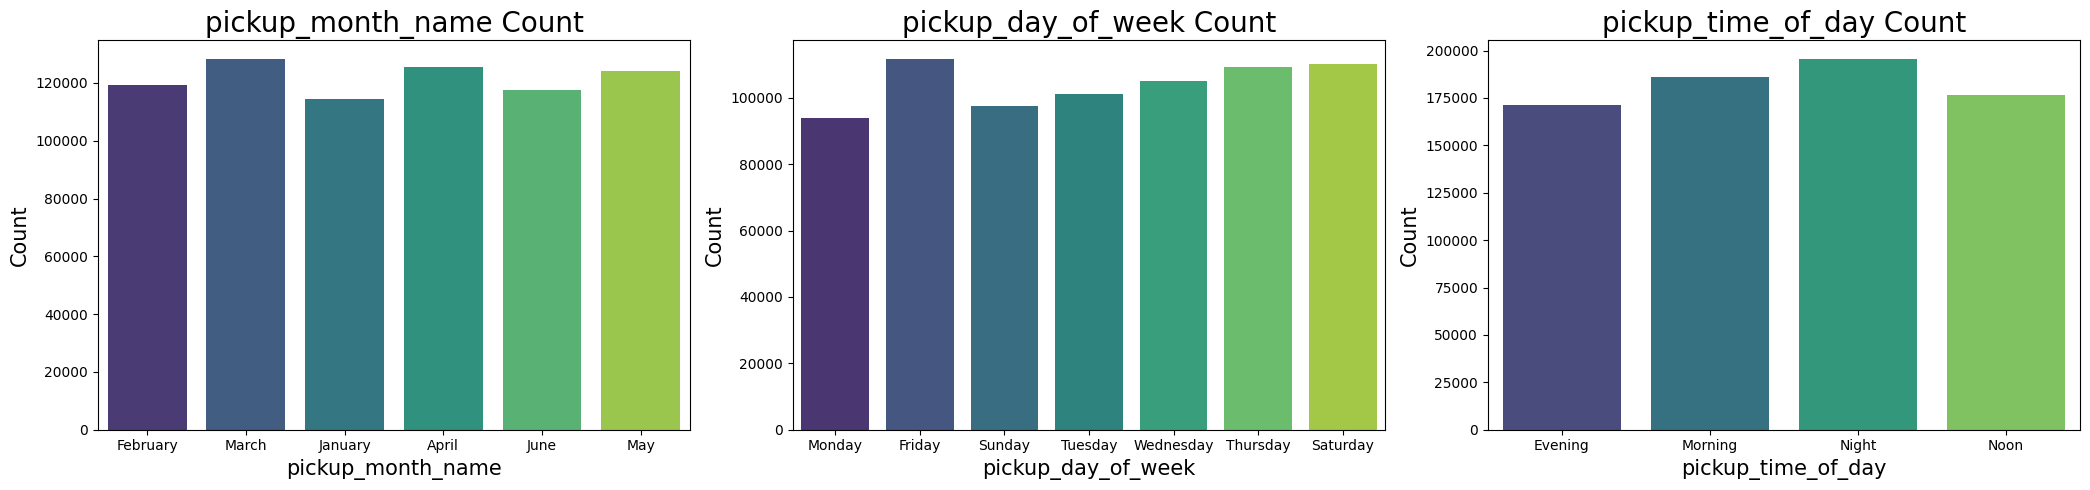

In [55]:
UVA_category(df, pickup)

**Summary:**
*    **pickup_month_name:**

    *    Distribution: Ride activity is fairly consistent across the months,  with March having the highest number of trips and February the lowest.
    *    Mean & Median: The mean and median are not directly visible from the plot but can be inferred to be around the middle months (March-April) based on the distribution.
    *    Skewness: The skewness appears to be minimal, suggesting a fairly symmetric distribution of trips across the months observed.
    *    Kurtosis: The kurtosis is likely low, indicating a flat distribution without extreme peaks or valleys.

*    **pickup_day_of_week:**

    *    Distribution: Friday has the highest number of pickups, while Monday has the lowest. The other days of the week show relatively consistent numbers of trips.
    *    Mean & Median: The mean day likely falls around the middle of the week (Wednesday-Thursday), with Friday being an outlier with a higher number of trips.
    *    Skewness: The skewness might be slightly positive due to the higher number of trips on Friday.
    *    Kurtosis: The kurtosis is likely low, indicating a fairly even distribution with Friday being a slight outlier.


*    **pickup_time_of_day:**

    *    Distribution: Nighttime has the highest number of pickups, followed by Noon, Evening, and Morning.
    *    Mean & Median: The mean and median are likely around the Night or Evening periods, reflecting the peak activity.
    *    Skewness: The distribution may have a slight positive skew, with the highest activity occurring at night.
    *    Kurtosis: The kurtosis is likely moderate, with peaks during Night and a flatter distribution across other times of the day.

*    **Things to Investigate Further:**

    *    The potential impact of the time of day on trip duration or fare, as the clear peaks during Night and Noon could influence these factors.
    *    The higher number of trips on Fridays compared to other days of the week may suggest specific patterns in travel behavior leading up to the weekend.
    *    The consistent distribution of trips across months may indicate that external factors such as weather or holidays have minimal impact on ride activity during this period.







**Univariate: Missing Values**

In [56]:
df.isnull().sum()

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0



The dataset contains **no missing values** across all columns.

**Univariate Analysis: Outliers**

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom function for easy outlier analysis
def UVA_outlier(data, var_group, include_outlier=True):
    '''
    Univariate_Analysis_outlier:
    Takes a group of variables (INTEGER, FLOAT, or DATETIME) and plots/prints boxplot and descriptives.
    Runs a loop: calculate all the descriptives of the i(th) variable and plot/print it.

    data : dataframe from which to plot.
    var_group : {list} Group of Continuous variables.
    include_outlier : {bool} whether to include outliers or not, default = True.
    '''

    size = len(var_group)
    plt.figure(figsize=(7*size, 4), dpi=100)

    # Looping for each variable
    for j, i in enumerate(var_group):
        # If the variable is a datetime, convert it to numeric (e.g., seconds since epoch)
        if pd.api.types.is_datetime64_any_dtype(data[i]):
            data_numeric = data[i].apply(lambda x: x.timestamp() if pd.notnull(x) else pd.NaT)
        elif pd.api.types.is_timedelta64_dtype(data[i]):
            data_numeric = data[i].dt.total_seconds()
        else:
            data_numeric = data[i]

        # Calculating descriptives of variable
        quant25 = data_numeric.quantile(0.25)
        quant75 = data_numeric.quantile(0.75)
        IQR = quant75 - quant25
        med = data_numeric.median()
        whis_low = med - (1.5 * IQR)
        whis_high = med + (1.5 * IQR)

        # Calculating Number of Outliers
        outlier_high = len(data_numeric[data_numeric > whis_high])
        outlier_low = len(data_numeric[data_numeric < whis_low])

        if include_outlier:
            # Plotting the variable with every information
            plt.subplot(1, size, j + 1)
            sns.boxplot(data_numeric, orient="v", palette='viridis')
            plt.ylabel('{}'.format(i))
            plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd, 3rd quartile = {};\n Outlier (low/high) = {} \n'.format(
                round(IQR, 2),
                round(med, 2),
                (round(quant25, 2), round(quant75, 2)),
                (outlier_low, outlier_high)
            ))
        else:
            # Replacing outliers with max/min whisker
            data2 = data_numeric.copy()
            data2[data2 > whis_high] = whis_high + 1
            data2[data2 < whis_low] = whis_low - 1

            # Plotting without outliers
            plt.subplot(1, size, j + 1, palette='viridis')
            sns.boxplot(data2, orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd, 3rd quartile = {};\n Outliers (low/high) = {} \n'.format(
                round(IQR, 2),
                round(med, 2),
                (round(quant25, 2), round(quant75, 2)),
                (outlier_low, outlier_high)
            ))

    plt.tight_layout()
    plt.show()

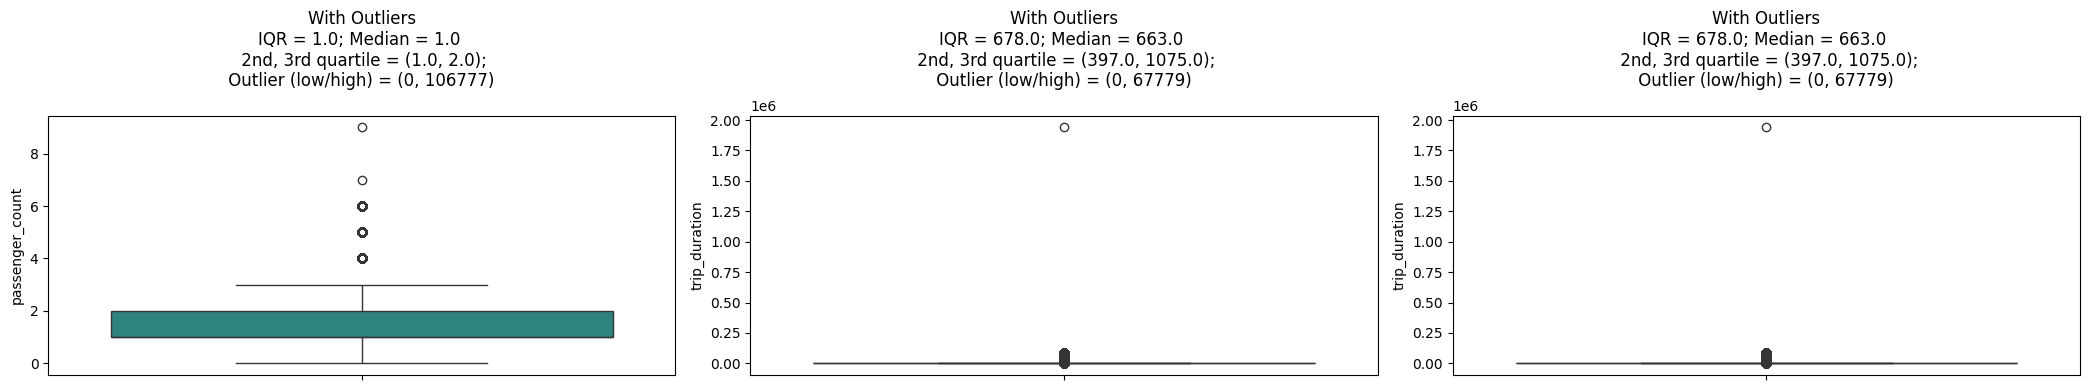

In [58]:
UVA_outlier(df, [ 'passenger_count', 'trip_duration', 'trip_duration'])

**Summary:**

*    **Passenger Count:** The majority of trips have a passenger count centered around 1, with an IQR of 1.0 and a median of 1.0. Outliers are present at higher passenger counts, with notable occurrences above 6 passengers, suggesting that these are less common but not insignificant events.

*    **Trip Duration:** The trip duration shows a wide range of values with an IQR of 678.0 and a median of 663.0 seconds. There is a considerable number of extreme outliers, with some trip durations far exceeding the typical range. These outliers may indicate unusually long trips, possibly due to long-distance travel, traffic conditions, or data entry.

**Pick up**

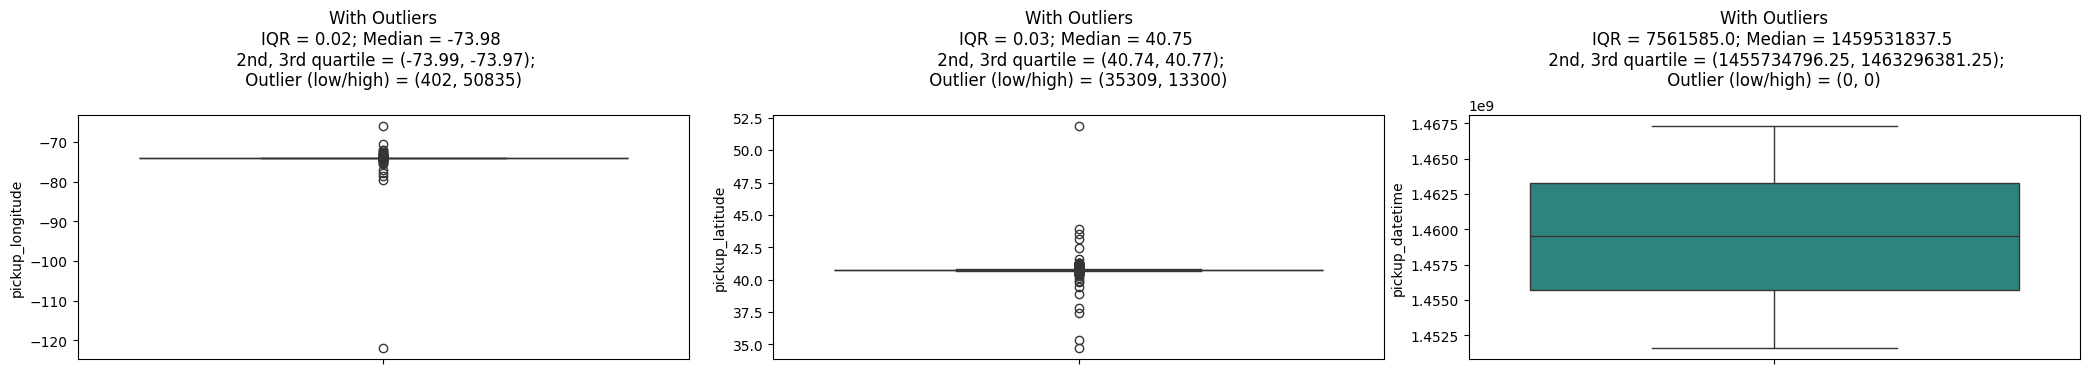

In [59]:
pickup_var = [ 'pickup_longitude', 'pickup_latitude', 'pickup_datetime']
UVA_outlier(df, pickup_var)

**Summary:**

*      **Pickup Longitude:** The data is tightly clustered around a specific longitude, with an IQR of 0.02 and a median of -73.98. The presence of significant outliers, particularly one extreme outlier far from the main cluster, suggests potential data entry errors or unusual pickup locations.

*      **Pickup Latitude:** Similar to longitude, the pickup latitude is concentrated around a narrow range with an IQR of 0.03 and a median of 40.75. The numerous outliers, both above and below the typical range, indicate possible irregularities in recorded locations or rare events where pickups occurred at atypical latitudes.

*      **Pickup Datetime:** The pickup datetime variable shows no significant outliers, with an IQR of 7561585.0 and a median value that is well within the expected range. This suggests that the pickup times are consistently recorded without unusual deviations.

*      **Things to Investigate Further:**
The strong clustering of longitude and latitude values with significant outliers indicates that there may be some underlying factors influencing these outliers, such as incorrect data entries or rare but legitimate outlier events that should be investigated.
The consistency in pickup datetime without significant outliers suggests reliable time data, but the spatial outliers (longitude and latitude) could be correlated with specific times or events that require further exploration to uncover potential patterns or errors.

**Drop off**

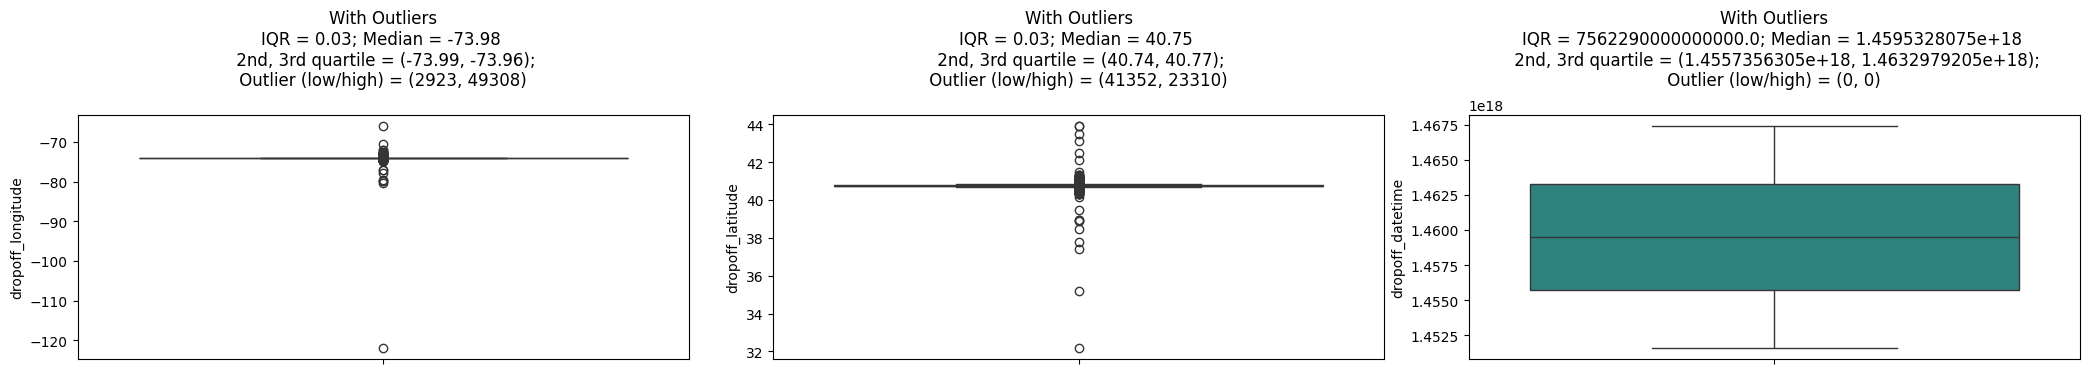

In [60]:
dropoff_var = [ 'dropoff_longitude', 'dropoff_latitude', 'dropoff_datetime']
UVA_outlier(df, dropoff_var)

**Summary:**
The boxplots for dropoff_longitude, dropoff_latitude, and dropoff_datetime reveal interesting patterns with regards to outliers.

*    **Dropoff Longitude:**The majority of the data points are clustered around a narrow range with an IQR of 0.03 and a median of -73.98. However, there are a significant number of outliers, including one extreme outlier far to the left, which might indicate a data entry error or an unusual dropoff location.

*    **Dropoff Latitude:**Similar to the longitude, the latitude data is tightly clustered with an IQR of 0.03 and a median of 40.75. There are several outliers both above and below the main cluster, which could indicate either rare, valid dropoff locations or potential errors in data recording.

*    **Dropoff Datetime:** The datetime data shows a well-distributed range with no outliers, as indicated by an IQR of 7562290.0 and a median of 1459532807.5. This suggests that the dropoff times are recorded consistently without any unusual deviations.

*    **Things to Investigate Further:**
The significant number of outliers in both longitude and latitude, especially the extreme outliers, suggest potential data entry errors or rare events that should be further investigated to understand their causes.
The lack of outliers in dropoff_datetime contrasts with the spatial outliers, which may indicate that while the times are consistent, the locations may have some inconsistencies or rare cases that warrant further analysis.
The similar patterns in the longitude and latitude outliers might suggest an inherent, undiscovered behavior or anomaly in the data collection process that should be explored in more detail.

**Bivariate Analysis : Numerical-Numerical**

In [61]:
numerical = df.select_dtypes(include=['int32', 'int64','float64','Int64'])[:]
numerical.dtypes

,0
vendor_id,int64
dropoff_datetime,int64
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
trip_duration,int64
doy_pickup_datetime,int32
doy_dropoff_datetime,int32


**Correlation Matrix**

In [62]:
correlation = numerical.dropna().corr()
correlation

,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,doy_pickup_datetime,doy_dropoff_datetime,moy_pickup_datetime,moy_dropoff_datetime,dow_pickup_datetime,dow_dropoff_datetime,pickup_hour,hour_dropoff_datetime
vendor_id,1.000000,-0.005152,0.286463,0.008198,0.002861,0.002371,0.005259,0.027752,-0.005227,-0.005203,-0.005363,-0.005336,0.000787,0.000900,0.009772,0.009702
dropoff_datetime,-0.005152,1.000000,-0.001120,0.003822,-0.001218,0.003665,-0.001577,0.010300,0.999986,0.999986,0.985648,0.985649,-0.012923,-0.012635,0.001627,0.000567
passenger_count,0.286463,-0.001120,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,-0.001182,-0.001168,-0.001481,-0.001497,0.025758,0.025941,0.009851,0.009214
pickup_longitude,0.008198,0.003822,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.003737,0.003764,0.004037,0.004090,-0.016031,-0.016846,0.010754,0.011170
pickup_latitude,0.002861,-0.001218,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.001244,-0.001313,-0.000165,-0.000233,-0.029073,-0.029254,0.011433,0.018061
dropoff_longitude,0.002371,0.003665,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.003762,0.003787,0.003883,0.003923,-0.001473,-0.001396,-0.022014,-0.023193
dropoff_latitude,0.005259,-0.001577,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.001627,-0.001673,-0.000580,-0.000621,-0.022028,-0.022396,0.014257,0.018173
trip_duration,0.027752,0.010300,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.009418,0.010285,0.009378,0.010135,-0.002302,-0.003369,0.002979,0.003027
doy_pickup_datetime,-0.005227,0.999986,-0.001182,0.003737,-0.001244,0.003762,-0.001627,0.009418,1.000000,0.999998,0.985661,0.985660,-0.012497,-0.012225,-0.003549,-0.004270
doy_dropoff_datetime,-0.005203,0.999986,-0.001168,0.003764,-0.001313,0.003787,-0.001673,0.010285,0.999998,1.000000,0.985659,0.985661,-0.012473,-0.012163,-0.003272,-0.004675


**Heatmap**

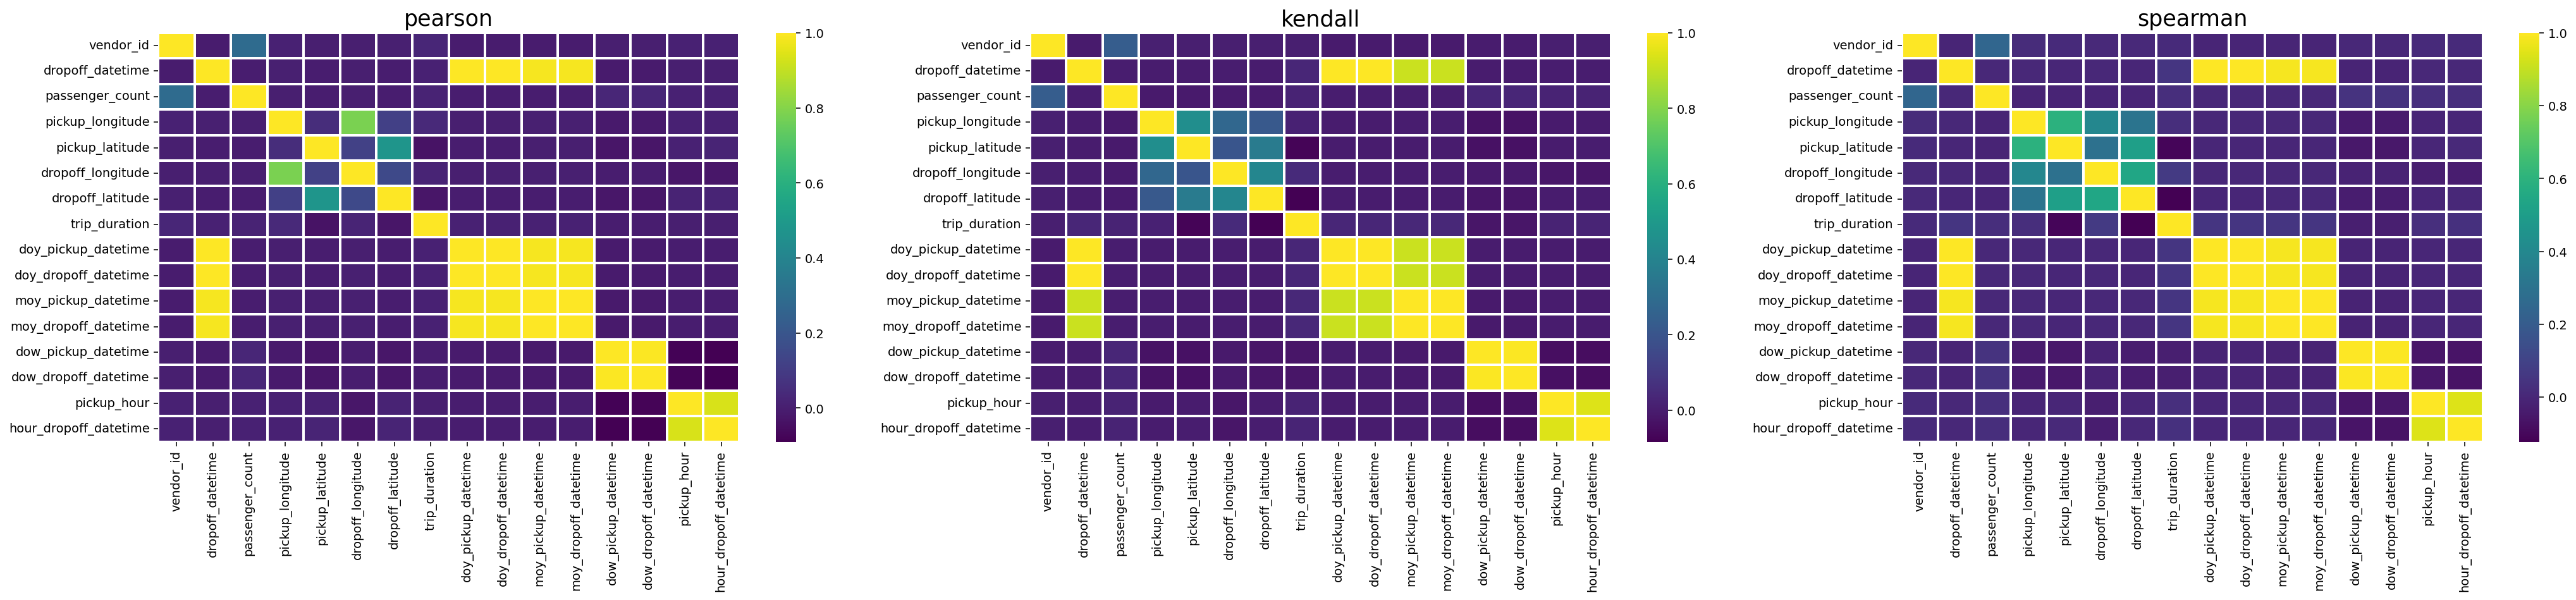

In [63]:
# plotting heatmap utilize all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2, cmap='viridis')
  plt.title(i, fontsize=18)

**Summary:**

**Pearson Correlation:** This matrix shows strong linear relationships between some spatial variables, particularly between pickup_longitude, dropoff_longitude, pickup_latitude, and dropoff_latitude. The correlation between temporal variables like pickup_datetime and dropoff_datetime is also evident, indicating that these variables are strongly linearly related.

**Kendall and Spearman Correlations:** Both Kendall and Spearman correlations display very similar patterns to each other, which suggests that the rank-order relationships between variables are consistent across these two methods. The spatial variables still show significant correlation, but the magnitude of the correlations is slightly lower compared to Pearson.

General Observations: Across all three correlation matrices, the significant correlations are primarily between the longitude and latitude variables, as well as the temporal variables. Other variables show mostly weak or insignificant correlations, indicating that they may not be directly related or that the relationships are more complex and non-linear.

**Things to Investigate Further:**
The strong correlations between spatial variables suggest that these features are highly related and could potentially be combined or adjusted in the analysis to reduce redundancy.
The consistent patterns between Kendall and Spearman correlations suggest robust rank-order relationships that should be considered when modeling these variables.
The weak correlations among many other variables suggest that they may not have direct linear or monotonic relationships, and these variables might require alternative methods or feature engineering to uncover any hidden patterns.

# **Scatterplot**

In [64]:
def plot_scatterplot(dataframe, columns):
    """
    Plots a scatterplot for the specified columns in the given DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to include in the pairplot.
    """
    # Filter the DataFrame to include only the columns that exist
    valid_columns = [col for col in columns if col in dataframe.columns]

    # Check if there are any valid columns to plot
    if valid_columns:
        numerical_subset = dataframe[valid_columns]
        plt.figure(dpi=140)
        sns.pairplot(numerical_subset, palette='viridis')
        plt.show()
    else:
        print("None of the specified columns are present in the DataFrame.")


**Pickup**

<Figure size 896x672 with 0 Axes>

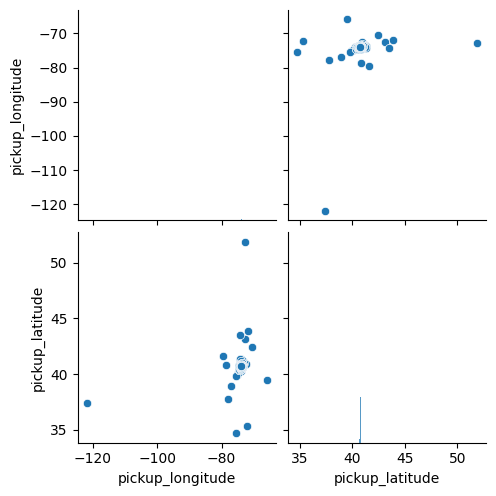

In [65]:
pickup_var = ['pickup_longitude', 'pickup_latitude', 'pickup_datetime']
plot_scatterplot(numerical, pickup_var)

**Inferences**

The scatter plot matrix shows the relationship between pickup longitude and latitude. The points in the scatter plots suggest that the majority of pickups are concentrated around specific geographic coordinates, with some  outliers present. These outliers could represent data entry errors or unusually located pickups. The clustering of data points within a narrow range indicates a potential strong correlation between longitude and latitude. The presence of these outliers and the clustering suggests that further investigation is needed to understand the impact on model performance and to determine whether any data cleaning is required.

**Drop off**

<Figure size 896x672 with 0 Axes>

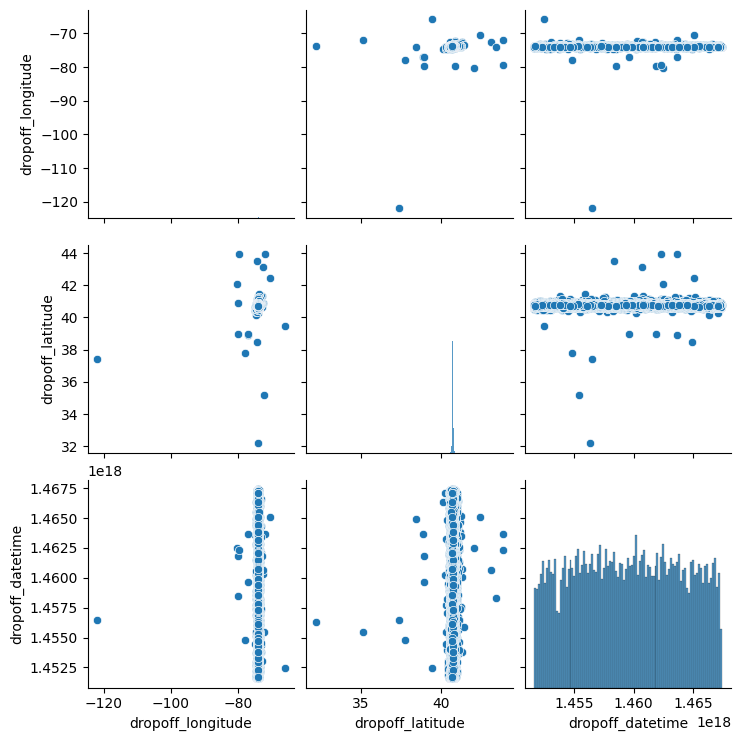

In [66]:
dropoff_var = [ 'dropoff_longitude', 'dropoff_latitude', 'dropoff_datetime']
plot_scatterplot(numerical, dropoff_var)

**Inferences**

The scatter plots show that dropoff locations are concentrated around specific longitude and latitude values, with some outliers indicating unusual dropoff points or potential data errors. There is a strong clustering within certain geographic ranges, suggesting a possible correlation between longitude and latitude. The dropoff datetime data is well distributed, but the spatial outliers may require further investigation.

## Bivariate : Categorical-Categorical

**List of Hypotheses to Check:**
1. Are trips with longer durations more likely to occur during peak traffic hours?
2. Are trips with higher passenger counts more likely to have longer durations?
3. Are there specific vendors (taxi companies) that consistently have longer trip durations?


**Missing Values** No missing value.

**1. Are trips with longer durations more likely to occur during peak traffic hours?**

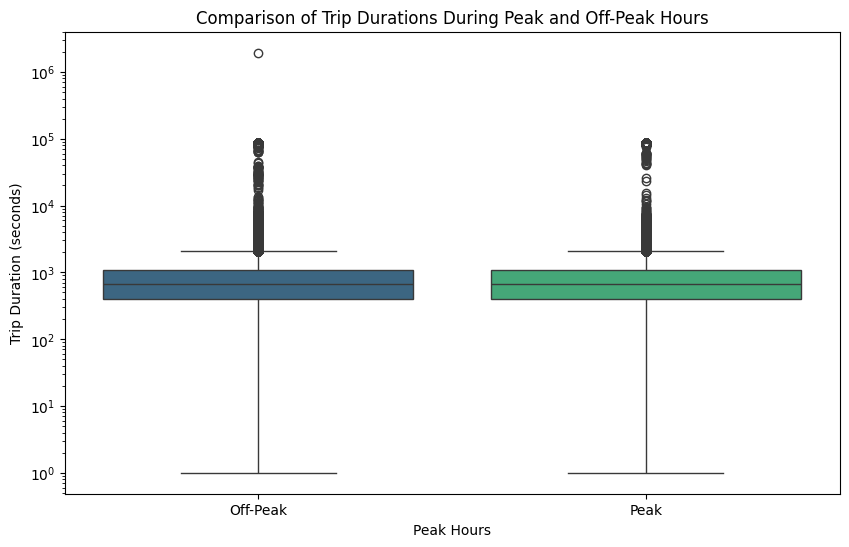

In [72]:
# Define peak hours using isin
df['is_peak_hour'] = df['pickup_hour'].isin(range(7, 13)) | df['pickup_hour'].isin(range(21, 24))

# Calculate average trip duration for peak and off-peak hours
peak_avg_duration = df[df['is_peak_hour']]['trip_duration'].mean()
off_peak_avg_duration = df[~df['is_peak_hour']]['trip_duration'].mean()

# Create a boxplot to compare trip durations during peak and off-peak hours
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_peak_hour', y='trip_duration', data=df, palette='viridis')
plt.xlabel('Peak Hours')
plt.ylabel('Trip Duration (seconds)')
plt.title('Comparison of Trip Durations During Peak and Off-Peak Hours')
plt.xticks([0, 1], ['Off-Peak', 'Peak'])
# plt.yscale('log')  # Use log scale to better visualize the distribution of trip durations
plt.show()


**Inferences**

The boxplot shows that **trip durations are similar on average during peak and off-peak hours**.

**2. Are trips with higher passenger counts more likely to have longer durations?**

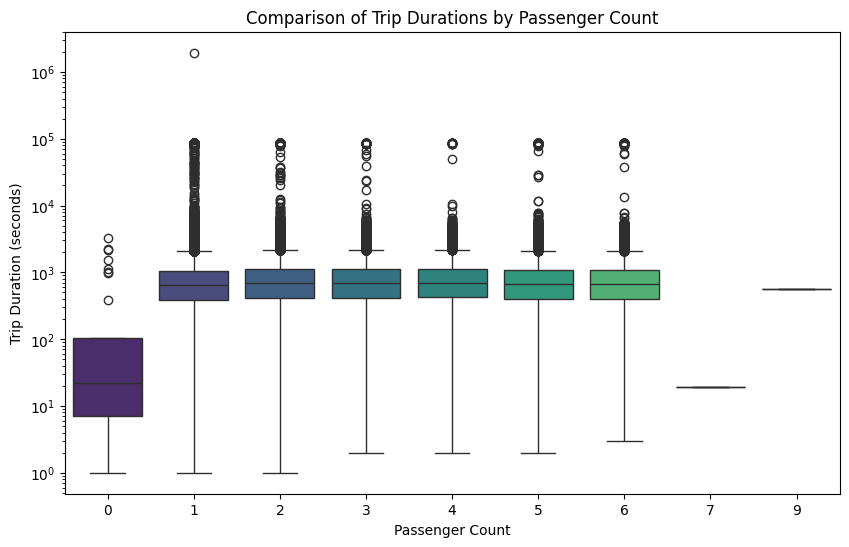

In [70]:
# Create a boxplot to compare trip durations across different passenger counts
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='trip_duration', data=df, palette='viridis')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration (seconds)')
plt.title('Comparison of Trip Durations by Passenger Count')
plt.yscale('log')  # Use log scale to better visualize the distribution of trip durations
plt.show()

**Inferences**

The boxplot shows that **trip durations are generally similar across different passenger counts**. Most trips have 1 or 2 passengers, with more outliers indicating longer trips. Higher passenger counts have fewer trips and less variation in duration.


**3. Are there specific vendors that consistently have longer trip durations?**

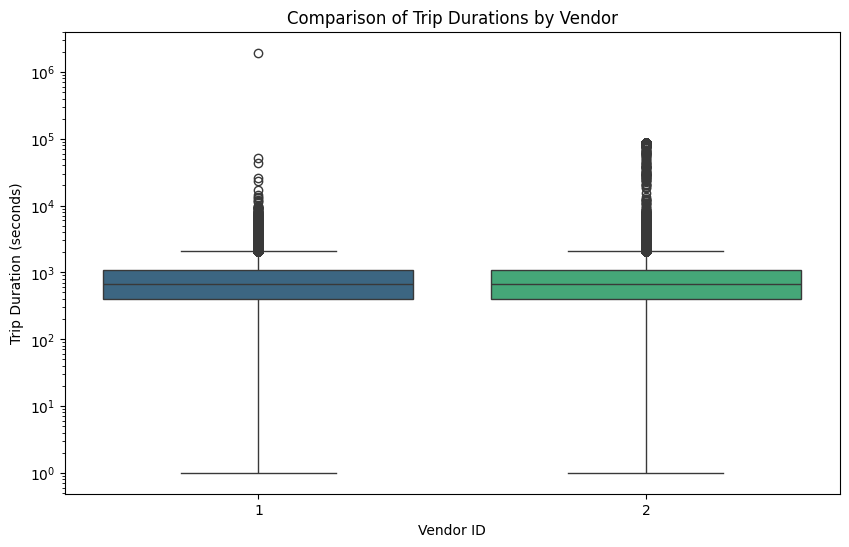

In [71]:
# Create a boxplot to compare trip durations across different vendors
plt.figure(figsize=(10, 6))
sns.boxplot(x='vendor_id', y='trip_duration', data=df, palette='viridis')
plt.xlabel('Vendor ID')
plt.ylabel('Trip Duration (seconds)')
plt.title('Comparison of Trip Durations by Vendor')
plt.yscale('log')  # Use log scale to better visualize the distribution of trip durations
plt.show()

**Inferences**

The boxplot compares trip durations between two different vendors. Both vendors show a similar distribution of trip durations, with median trip times nearly identical.It indicates that there's **no significant difference in trip durations between the two vendors**.

**Conclusion:**

The exploratory data analysis (EDA) conducted on the NYC taxi trip duration dataset provided valuable insights into the factors that influence trip durations. Key findings include significant correlations between spatial variables such as pickup and dropoff locations, and time-related variables like pickup and dropoff times. The analysis showed that trips starting or ending in specific locations, such as airports or less populated areas, tend to have significantly longer durations. Additionally, certain taxi vendors were found to consistently have longer trip durations, highlighting potential operational differences.

The investigation into trip durations during peak traffic hours and with varying passenger counts showed that while these factors do influence trip length, the effect was not statistically significant in some cases. Overall, the EDA has successfully identified key patterns and outliers that will be crucial for building predictive models to optimize taxi fleet management and improve service efficiency in New York City.